The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


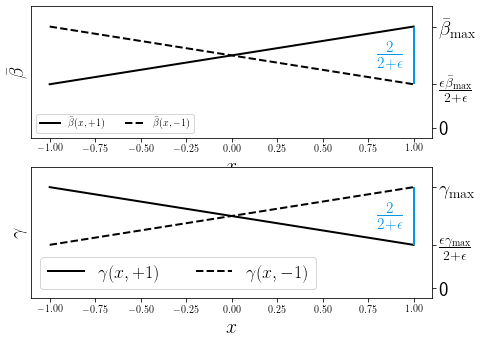

In [1]:
# Data generator and Figure Builder for Fig. 1
import xgi
import random
import pandas as pd
import numpy as np
import scipy as sp
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import ticker as ticker
from meanfield_object import meanfield_object
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display, Latex

font = {'size':16}
plt.rcParams['text.usetex'] = True
plt.rc('font',**font)

f1, ((ax1,ax2)) = plt.subplots(2,1)
f1.set_figwidth(6.2)
f1.set_figheight(4.6)
f1.tight_layout(pad=1.0)
axs = [ax1,ax2]

ax1.set_xlabel(xlabel=r'$x$',fontsize=20)
ax1.set_ylabel(ylabel=r'$\bar{\beta}$',fontsize=20)
ax2.set_xlabel(xlabel=r'$x$',fontsize=20)
ax2.set_ylabel(ylabel=r'$\gamma$',fontsize=20)


betabar = 1
gamma = 1
ep = 1.5

def get_beta(x,s,ep,betabar):
    return (1+s*x+ep)*betabar/(2+ep)

def get_gamma(x,s,ep,gamma):
    return (1-s*x+ep)*gamma/(2+ep)

xinput = np.linspace(-1,1,300)
betaP = get_beta(xinput,1,ep,betabar)
betaN = get_beta(xinput,-1,ep,betabar)
gammaP = get_gamma(xinput,1,ep,gamma)
gammaN = get_gamma(xinput,-1,ep,gamma)

ax1.plot(xinput,betaP, color='k',linewidth=2,label=r'$\bar{\beta}(x,+1)$')
ax1.plot(xinput,betaN, color='k',linewidth=2,linestyle='--',label=r'$\bar{\beta}(x,-1)$')
ax1.legend(loc='lower left', ncols=2)
ax1.vlines(x=1,ymin=min(betaP),ymax=max(betaP),color=(7/255, 151/255, 231/255),linewidth=2)
ax1.set_yticks([0,min(betaP),max(betaP)])
ax1.tick_params(left=False,labelleft=False,right=True,labelright=True)
ax1.set_yticklabels([0,r'$\frac{\epsilon \bar{\beta}_{\rm{max}}}{2+\epsilon}$',r'$\bar{\beta}_{\rm{max}}$'],fontsize=20)
ax1.text(x=0.8,y=0.66,s=r'$\frac{2}{2+\epsilon}$',color=(7/255, 151/255, 231/255),fontsize=22)
ax1.set_ylim([-0.1,1.2])

ax2.plot(xinput,gammaP, color='k',linewidth=2,label=r'$\gamma(x,+1)$')
ax2.plot(xinput,gammaN, color='k',linewidth=2,linestyle='--',label=r'$\gamma(x,-1)$')
ax2.vlines(x=1,ymin=min(gammaP),ymax=max(gammaP),color=(7/255, 151/255, 231/255),linewidth=2)
ax2.legend(loc='lower left', ncols=2,fontsize=18)
ax2.set_yticks([0,min(gammaP),max(gammaP)])
ax2.tick_params(left=False,labelleft=False,right=True,labelright=True)
ax2.set_yticklabels([0,r'$\frac{\epsilon \gamma_{\rm{max}}}{2+\epsilon}$',r'$\gamma_{\rm{max}}$'],fontsize=20)
ax2.text(x=0.8,y=0.66,s=r'$\frac{2}{2+\epsilon}$',color=(7/255, 151/255, 231/255),fontsize=22)
ax2.set_ylim([-0.1,1.2])

plt.savefig('opinondepend.eps',bbox_inches = "tight")
plt.savefig('opinondepend.png',dpi=300,bbox_inches = "tight")

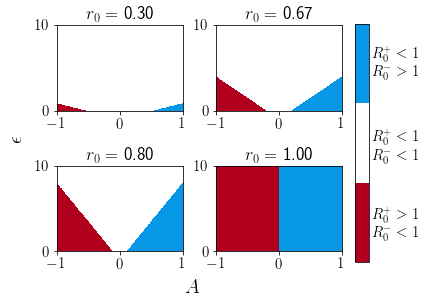

In [2]:
# Data generator and figure builder for Fig. 3
import xgi
import random
import pandas as pd
import numpy as np
import scipy as sp
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import ticker as ticker
from meanfield_object import meanfield_object
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display, Latex

font = {'size':15}
plt.rcParams['text.usetex'] = True
plt.rc('font',**font)

km = 6
gamma = 0.2
betabar = 0.6
m = 4/15

colors = [(176/255,0/255,29/255), (1,1,1), (7/255, 151/255, 231/255)]
cmap_name = 'stability'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors,N=3)

def get_r(R0,ep,x,s):
    return R0*((np.abs(x+s)+ep)/(np.abs(x-s)+ep))

f3, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
f3.set_figwidth(6.2)
f3.set_figheight(4.6)
f3.tight_layout(pad=1.0)
axs = [ax1,ax2,ax3,ax4]
p = 0
r0list = [0.3,m*betabar*(km-1)/(km*gamma),0.8,1]
for r0 in r0list:
    x,ep = np.meshgrid(np.linspace(-1,1,300),np.linspace(0.001, 10, 300))
    r0p =  get_r(r0,ep,x,1)
    r0n =  get_r(r0,ep,x,-1)
    data = np.where(r0p < 1, 0, 1) + np.where(r0n < 1, 0, -1)
    ax = axs[p]
    plot = ax.pcolormesh(x,ep,data, cmap=cmap)
    ax.set(title=f'$r_0=$ {r0:.2f}')
    p = p + 1
    

f3.supxlabel(f'$A$',x=0.465,y=0.075,fontsize=20)
f3.supylabel(f'$\epsilon$',y=0.55,x=0.05,fontsize=20)
f3.tight_layout()
f3.subplots_adjust(right=0.8)
cbar_ax = f3.add_axes([0.83, 0.18, 0.03, .72])
cbar = f3.colorbar(plot,cax=cbar_ax,ticks=[-0.65,0,0.7])
cbar.ax.tick_params(size=0)
TL = ['$R_0^+>1$ \n$R_0^-<1$','$R_0^+<1$ \n$R_0^-<1$','$R_0^+<1$ \n$R_0^->1$']
cbar.set_ticklabels(TL)
plt.savefig('stability.eps',bbox_inches = "tight")
plt.savefig('stability.png',dpi=300,bbox_inches = "tight")

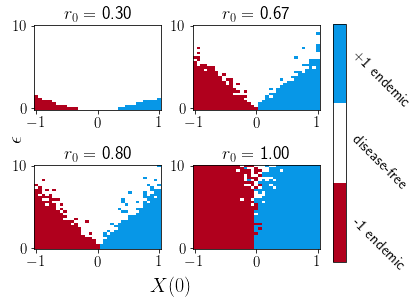

In [3]:
# Figure builder for Fig. 4, requires the files:
# sim_stability_sweep_P1.txt
# sim_stability_sweep_P2.txt
# sim_stability_sweep_P3.txt
# sim_stability_sweep_P4.txt
#
# which are generatated using the data generators
# Fig_4_panel_1_data_generator.py
# Fig_4_panel_2_data_generator.py
# Fig_4_panel_3_data_generator.py
# Fig_4_panel_4_data_generator.py
import xgi
import random
import pandas as pd
import numpy as np
import scipy as sp
import time
import matplotlib.pyplot as plt
from meanfield_object import meanfield_object
from matplotlib.colors import LinearSegmentedColormap

colors = [(176/255,0/255,29/255), (1,1,1), (7/255, 151/255, 231/255)]
cmap_name = 'stability'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors,N=3)

font = {'size':15}
plt.rcParams['text.usetex'] = True
plt.rc('font',**font)

sweepvar1 = np.loadtxt('sim_stability_sweep_P1.txt')
sweepvar2 = np.loadtxt('sim_stability_sweep_P2.txt')
sweepvar3 = np.loadtxt('sim_stability_sweep_P3.txt')
sweepvar4 = np.loadtxt('sim_stability_sweep_P4.txt')


epvec = np.linspace(0.001, 10,35)
xvec = np.linspace(-1,1,35)
xx, ep = np.meshgrid(xvec,epvec)

f3, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
f3.set_figwidth(6.2)
f3.set_figheight(4.6)
f3.tight_layout(pad=3.0)
axs = [ax1,ax2,ax3,ax4]

plot1 = axs[0].pcolormesh(xx,ep,np.transpose(sweepvar1),cmap=cmap)
axs[0].set(title=f'$r_0=$ {0.30:.2f}')
plot2 = axs[1].pcolormesh(xx,ep,np.transpose(sweepvar2),cmap=cmap)
axs[1].set(title=f'$r_0=$ {0.67:.2f}')
plot3 = axs[2].pcolormesh(xx,ep,np.transpose(sweepvar3),cmap=cmap)
axs[2].set(title=f'$r_0=$ {0.80:.2f}')
plot4 = axs[3].pcolormesh(xx,ep,np.transpose(sweepvar4),cmap=cmap)
axs[3].set(title=f'$r_0=$ {1.00:.2f}')


f3.supxlabel(f'$X(0)$',x=0.465,y=0.075,fontsize=20)
f3.supylabel(f'$\epsilon$',y=0.55,x=0.1,fontsize=20)
f3.tight_layout()
f3.subplots_adjust(right=0.8)
cbar_ax = f3.add_axes([0.83, 0.18, 0.03, .72])
cbar = f3.colorbar(plot4,cax=cbar_ax,ticks=[-0.65,0.05,0.75])
cbar.ax.tick_params(size=0)
TL = ['-1 endemic','disease-free','+1 endemic']
cbar.set_ticklabels(TL,rotation=-45)
plt.savefig('stability_sim.png',dpi=300,bbox_inches = "tight")

0.6674285714285714
0.4004
0.06666666666666667


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


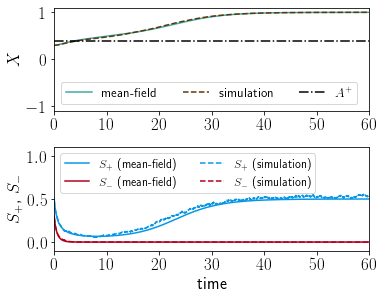

In [4]:
# data generator and figure building for Fig. 5
# requires the files
# avg_opinion_fig1data.json
# frac_sp1_fig1data.json
# frac_sn1_fig1data.json
# 
# which are generatated using Fig_5_agent_based_simulation_data_generator.py
import xgi
import random
import pandas as pd
import numpy as np
import scipy as sp
import time
import json as json
import matplotlib.pyplot as plt
from CNO import CNO
from simulation import simulation
from reduced_meanfield_object import reduced_meanfield_object
from meanfield_object import meanfield_object

with open('avg_opinion_fig1data.json', 'rb') as fp:
    avg_opinion = json.load(fp)
    
with open('frac_sp1_fig1data.json', 'rb') as fp:
    frac_sp1 = json.load(fp)

with open('frac_sn1_fig1data.json', 'rb') as fp:
    frac_sn1 = json.load(fp)   

dt = 0.25
tbang = np.arange(0,len(avg_opinion)*dt,dt)

m = (4/15)
mk = 7
C = 0.1001
betabar = 0.584
gamma = 0.2
ep = 1
r0 = (m*(mk-1)*betabar)/(mk*gamma)
K = (m*C*(2+ep))/(gamma)
timeconstant = gamma/(2+ep)

print(r0)
print(K)
print(timeconstant)

v0 = [0.5,0.3,0.3]
system = reduced_meanfield_object(r0,K,ep,timeconstant, v0)
t,y = system.euler_solver([0,120], 0.05, 0)
    
font = {'size':17}
plt.rcParams['text.usetex'] = True
plt.rc('font',**font)
    
f1,axs = plt.subplots(2)
f1.tight_layout(pad=0.5)
widthoffig = 6
f1.set_figwidth(5)
f1.set_figheight(4)
axs[0].plot(t, y[2,:], color=(63/255,171/255,163/255))
axs[0].plot(timeconstant*tbang,avg_opinion, color=(92/255,54/255,8/255), linestyle='dashed')
axs[0].axhline(y=(1-r0)*(1+ep)/(1+r0),color='k',linestyle='dashdot')
axs[0].legend(['mean-field','simulation','$A^+$'], loc='lower left',ncol=3,fontsize=13)
axs[0].set_ylim(-1.1,1.1)
axs[0].set_xlim(0,60)
axs[0].set(ylabel=r'$X$')

axs[1].plot(t, y[0,:], color=(7/255, 151/255, 231/255))
axs[1].plot(t, y[1,:], color=(176/255,0/255,29/255))
axs[1].plot(timeconstant*tbang,frac_sp1, color=(7/255, 151/255, 231/255), linestyle='dashed')
axs[1].plot(timeconstant*tbang,frac_sn1, color=(176/255,0/255,29/255),linestyle='dashed')
axs[1].set_ylim(-0.1,1.1)
axs[1].set_xlim(0,60)
axs[1].set(xlabel='time', ylabel='$S_{+}$, $S_{-}$')
axs[1].legend(['$S_{+}$ (mean-field)','$S_{-}$ (mean-field)','$S_{+}$ (simulation)','$S_{-}$ (simulation)'], loc='upper left', ncol=2,fontsize=12)

plt.savefig('timeseries_infection_rebound.eps',bbox_inches = "tight")
plt.savefig('timeseries_infection_rebound.png')

0.6666666666666665
0.39999999999999997
0.06666666666666667


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


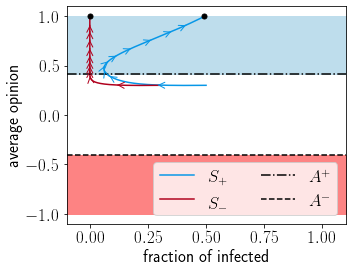

In [5]:
# Data generator and figure builder for Fig. 6
import xgi
import random
import pandas as pd
import numpy as np
import scipy as sp
import time
import json as json
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from CNO import CNO
from simulation import simulation
from reduced_meanfield_object import reduced_meanfield_object


def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

dt = 0.25

m = (4/15)
mk = 6
C = 0.1
betabar = 0.6
gamma = 0.2
ep = 1
r0 = (m*(mk-1)*betabar)/(mk*gamma)
K = (m*C*(2+ep))/(gamma)
timeconstant = gamma/(2+ep)

print(r0)
print(K)
print(timeconstant)



r0 = 0.6
K = 0.3
timeconstant = 1

r0 = 0.66
K = 0.4
timeconstant = 0.067


v0 = [0.5,0.3,0.3]
system = reduced_meanfield_object(r0,K,ep,timeconstant, v0)
t,y = system.euler_solver([0,50], 0.01)

font = {'size':17}
plt.rcParams['text.usetex'] = True
plt.rc('font',**font)

f2 = plt.figure()
ax = plt.axes()
f2.set_figwidth(5)
f2.set_figheight(4)

x = np.arange(-0.1,1.1,0.01)

line1 = ax.plot(y[0,:], y[2,:], color=(7/255, 151/255, 231/255), label='$S_+$')
line2 = ax.plot(y[1,:], y[2,:], color=(176/255,0/255,29/255), label='$S_-$')
ax.plot(y[0,-1],1,'k.',markersize=10)
ax.plot(y[1,-1],1,'k.',markersize=10)


for i in range(0,10):
    add_arrow(line1[0], position=y[0,350*(i)+50])
    add_arrow(line2[0], position=y[1,350*(i)+50])

ax.axhline(y=(1-r0)*(1+ep)/(1+r0),color='k',label='$A^+$',linestyle='-.')
ax.axhline(y=-(1-r0)*(1+ep)/(1+r0),color='k',linestyle='--', label='$A^-$')
ax.fill_between(x,(1-r0)*(1+ep)/(1+r0)*np.ones(len(x)),1,color=(190/255,221/255,236/255))
ax.fill_between(x,-(1-r0)*(1+ep)/(1+r0)*np.ones(len(x)),-1,color=(253/255,131/255,131/255))
ax.set(xlabel='fraction of infected',ylabel='average opinion')
ax.legend(loc='lower right',ncols = 2)

ax.set_xlim(-0.1,1.1)
ax.set_ylim(-1.1,1.1)

plt.savefig('phase_space_infection_rebound.eps',bbox_inches = "tight")
plt.savefig('phase_space_infection_rebound.png')

1.44
3.1999999999999997
0.016666666666666666


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


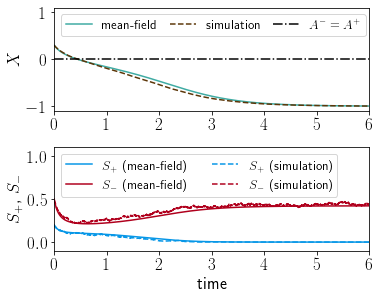

In [6]:
# data generator and figure building for Fig. 7
# requires the files
# avg_opinion_fig2data.json
# frac_sp1_fig2data.json
# frac_sn1_fig2data.json
# 
# which are generatated using Fig_7_agent_based_simulation_data_generator.py
import xgi
import random
import pandas as pd
import numpy as np
import scipy as sp
import time
import json as json
import matplotlib.pyplot as plt
from CNO import CNO
from simulation import simulation
from reduced_meanfield_object import reduced_meanfield_object
from meanfield_object import meanfield_object

with open('avg_opinion_fig2data.json', 'rb') as fp:
    avg_opinion2 = json.load(fp)
    
with open('frac_sp1_fig2data.json', 'rb') as fp:
    frac_sp12 = json.load(fp)

with open('frac_sn1_fig2data.json', 'rb') as fp:
    frac_sn12 = json.load(fp)   

dt = 0.05
tbang = np.arange(0,len(avg_opinion2)*dt,dt)

m = (8/15)
mk = 10
C = 0.1
betabar = 0.6
gamma = 0.2
ep = 10
r0 = (m*(mk-1)*betabar)/(mk*gamma)
K = (m*C*(2+ep))/(gamma)
timeconstant = gamma/(2+ep)

print(r0)
print(K)
print(timeconstant)

v0 = [0.2,0.5,0.3]
system = reduced_meanfield_object(r0,K,ep,timeconstant, v0)
t,y = system.euler_solver([0,30], 0.01,0)
font = {'size':17}
plt.rcParams['text.usetex'] = True
plt.rc('font',**font)
    
f1, axs = plt.subplots(2)
f1.tight_layout(pad=0.5)
f1.set_figwidth(5)
f1.set_figheight(4)

axs[0].plot(t, y[2,:], color=(63/255,171/255,163/255))
axs[0].plot(timeconstant*tbang, avg_opinion2, color=(92/255,54/255,8/255), linestyle='dashed')
axs[0].axhline(y=0,color='k', linestyle='dashdot')
axs[0].legend(['mean-field','simulation', '$A^-=A^+$'], loc='upper left',ncol=3,fontsize=13,columnspacing=1.0)
axs[0].set_ylim(-1.1,1.1)
axs[0].set_xlim(0,6)
axs[0].set(ylabel=r'$X$')

axs[1].plot(t, y[0,:], color=(7/255, 151/255, 231/255))
axs[1].plot(t, y[1,:], color=(176/255,0/255,29/255))
axs[1].plot(timeconstant*tbang, frac_sp12, color=(7/255, 151/255, 231/255), linestyle='dashed')
axs[1].plot(timeconstant*tbang, frac_sn12, color=(176/255,0/255,29/255),linestyle='dashed')
axs[1].set_ylim(-0.1,1.1)
axs[1].set_xlim(0,6)
axs[1].set(xlabel='time', ylabel=r'$S_{+}$, $S_{-}$')
axs[1].legend([r'$S_{+}$ (mean-field)',r'$S_{-}$ (mean-field)',r'$S_{+}$ (simulation)',r'$S_{-}$ (simulation)'], loc='upper left', ncol=2,fontsize=13)

plt.savefig('timeseries_biased_overturning.eps',bbox_inches = "tight")
plt.savefig('timeseries_biased_overturning.png')

1.44
3.1999999999999997
0.016666666666666666


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


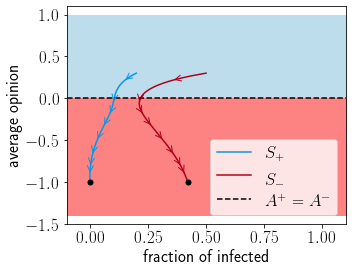

In [7]:
# Data generator and figure builder for Fig. 8
import random
import pandas as pd
import numpy as np
import scipy as sp
import time
import json as json
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from CNO import CNO
from simulation import simulation
from reduced_meanfield_object import reduced_meanfield_object

def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

dt = 0.25

m = (8/15)
mk = 10
C = 0.1
betabar = 0.6
gamma = 0.2
ep = 10
r0 = (m*(mk-1)*betabar)/(mk*gamma)
K = (m*C*(2+ep))/(gamma)
timeconstant = gamma/(2+ep)

print(r0)
print(K)
print(timeconstant)


x = np.arange(-0.1,1.1,0.01)
v0 = [0.2,0.5,0.3]
system = reduced_meanfield_object(r0,K,ep,timeconstant, v0)
t,y = system.euler_solver([0,50], 0.01)

font = {'size':17}
plt.rcParams['text.usetex'] = True
plt.rc('font',**font)

f2 = plt.figure()
ax = plt.axes()
f2.set_figwidth(5)
f2.set_figheight(4)

line1 = ax.plot(y[0,:], y[2,:],color=(7/255, 151/255, 231/255), label='$S_+$')
line2 = ax.plot(y[1,:], y[2,:],color=(176/255,0/255,29/255), label='$S_-$')
ax.plot(y[0,-1],-1,'k.',markersize=10)
ax.plot(y[1,-1],-1,'k.',markersize=10)

for i in range(0,8):
    add_arrow(line1[0], position=y[0,50*(i)+5])
    add_arrow(line2[0], position=y[1,50*(i)+5])

ax.axhline(y=0,color='k',label='$A^+=A^-$', linestyle='dashed')
ax.fill_between(x,np.zeros(len(x)),1,color=(190/255,221/255,236/255))
ax.fill_between(x,np.zeros(len(x)),-1.4,color=(253/255,131/255,131/255))
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-1.5,1.1)
ax.legend(loc='lower right')
ax.set(xlabel='fraction of infected',ylabel='average opinion')

plt.savefig('phase_space_opinion_overturn.eps',bbox_inches = "tight")
plt.savefig('phase_space_opinion_overturn.png')

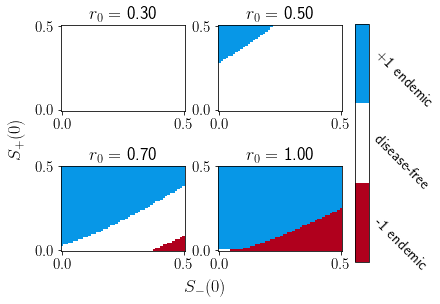

In [8]:
# Data generator and figure builder for Fig. 9
import xgi
import random
import pandas as pd
import numpy as np
import scipy as sp
import time
import matplotlib.pyplot as plt
from reduced_meanfield_object import reduced_meanfield_object
from matplotlib.colors import LinearSegmentedColormap

font = {'size':15}
plt.rcParams['text.usetex'] = True
plt.rc('font',**font)

colors = [(176/255,0/255,29/255), (1,1,1), (7/255, 151/255, 231/255)]
cmap_name = 'stability'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors,N=3)

m = (4/15)
C = 0.1
betabar = 0.6
mk = 6;
gamma = 0.2
ep = 0.01
x = 0.1;
r0 = (m*(mk-1)*betabar)/(mk*gamma)
K = 0.25
timeconstant = 0.1

initial_condition_infectionP = np.linspace(0,0.5,50)
initial_condition_infectionN = np.linspace(0,0.5,50)
tend = 100
T = np.zeros((len(initial_condition_infectionN), len(initial_condition_infectionP)))
i = 0
j = 0

p = 0
other_param_vec = [0.3,0.5,0.7,1]
f3, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
f3.set_figwidth(6.2)
f3.set_figheight(4.6)
f3.tight_layout(pad=1.0)
axs = [ax1,ax2,ax3,ax4]


for param in other_param_vec:
    i = 0
    j = 0
    for startP in initial_condition_infectionP:
        i = 0
        for startN in initial_condition_infectionN:
            r0 = param
            v0 = [startP,startN,x];
            system = reduced_meanfield_object(r0,K,ep,timeconstant, v0,)
            t,y = system.euler_solver([0,tend], 0.25)
            if y[0,-1] > 0.01:
                T[i,j] = 1
            elif y[1,-1] > 0.01:
                T[i,j] = -1
            else:
                T[i,j] = 0
            i = i + 1
        j = j + 1
        
    ax = axs[p]
    icN, icP = np.meshgrid(initial_condition_infectionN,initial_condition_infectionP)
    plot = ax.pcolormesh(icN,icP,np.transpose(T),cmap=cmap,vmin = -1, vmax=1)
    ax.set(title=f'$r_0=$ {param:.2f}')
    p = p + 1
    
    
f3.supxlabel(f'$S_-(0)$', x=0.492,y=0.075)
f3.supylabel(f'$S_+(0)$', y=0.55,x=0.05)
f3.tight_layout()
f3.subplots_adjust(right=0.8)
cbar_ax = f3.add_axes([0.83, 0.18, 0.03, .72])
cbar = f3.colorbar(plot,cax=cbar_ax,ticks=[-0.65,0.05,0.75])
cbar.ax.tick_params(size=0)
TL = ['-1 endemic','disease-free','+1 endemic']
cbar.set_ticklabels(TL,rotation=-45)
plt.savefig('initial_condition_map.png', dpi=200)

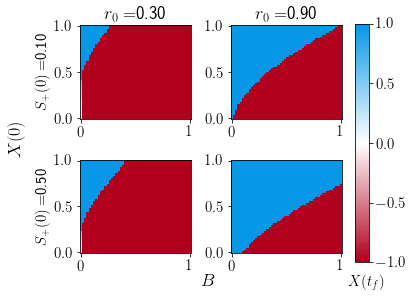

In [9]:
# Figure builder for Fig. 10
# requires the files
# numeric_constant_force_data_0.txt
# numeric_constant_force_data_1.txt
# numeric_constant_force_data_2.txt
# numeric_constant_force_data_3.txt
#
# which are generatated in Fig_10_data_generator.py
import xgi
import random
import pandas as pd
import numpy as np
import scipy as sp
import time
import matplotlib.pyplot as plt
from reduced_meanfield_object import reduced_meanfield_object
from matplotlib.colors import LinearSegmentedColormap


font = {'size':15}
plt.rcParams['text.usetex'] = True
plt.rc('font',**font)

colors = [(176/255,0/255,29/255), (1,1,1), (7/255, 151/255, 231/255)]
cmap_name = 'stability'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors,N=99)

out_param = [0.1,0.5]
p = 0
other_param_vec = [0.3,0.9]
f3, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
f3.set_figwidth(6.2)
f3.set_figheight(4.6)
f3.tight_layout(pad=1.0)
axs = [ax1,ax2,ax3,ax4]

initial_condition_infectionP = np.linspace(0,1,50)
initial_condition_infectionN = np.linspace(0,1,50)

for initialP in out_param: 
    for param in other_param_vec:
        ax = axs[p]
        titlestring = f'numeric_constant_force_data_{p}.txt'
        T = np.loadtxt(titlestring)
        icN, icP = np.meshgrid(initial_condition_infectionN,initial_condition_infectionP)
        plot = ax.pcolormesh(icN,icP,np.transpose(T),cmap=cmap,vmin = -1, vmax=1)
        if p == 0 or p == 1:
            ax.set(title=f'$r_0=${param:.2f}')
        if p == 0 or p == 2:
            ax.set(ylabel=f'$S_+(0)=${initialP:.2f}')
        p = p + 1
        
f3.supxlabel(f'$B$',y=0.1)
f3.supylabel(f'$X(0)$',y=0.55,x=0.05)
f3.tight_layout()
f3.subplots_adjust(right=0.8)
cbar_ax = f3.add_axes([0.83, 0.18, 0.03, .72])
cbar = f3.colorbar(plot,cax=cbar_ax,ticks=[-0.65,0.05,0.75])
cbar = f3.colorbar(plot,cax=cbar_ax)
cbar.set_label(f'$X(t_f)$',labelpad=-40,y=-0.05,rotation=0)

plt.savefig('heatmap_constant_forcing.png',dpi=300,bbox_inches = "tight")